<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/Detection_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
folder = '/content/drive/MyDrive/HinhBongHoa'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('apricot'):
    output = 0
  elif file.startswith('daisy'):
    output = 1
  elif file.startswith('lotus'):
    output = 2
  elif file.startswith('rose'):
    output = 3
  elif file.startswith('waterlily'):
    output = 4
 
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(40, 30))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)
     

In [3]:
!cp photos.npy "/content/drive/MyDrive/Data_Flower"
!cp labels.npy "/content/drive/MyDrive/Data_Flower"

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/MyDrive/Data_Flower/photos.npy')
labels = np.load('/content/drive/MyDrive/Data_Flower/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [5]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (850, 40, 30, 3)
x_test shape:  (365, 40, 30, 3)
y_train shape:  (850,)
y_test shape:  (365,)


In [6]:
x_train = x_train.reshape(850, 40, 30, 3)
x_test = x_test.reshape(365, 40, 30, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [8]:
(y_train.shape),(y_test.shape)

((850, 5), (365, 5))

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(40, 30, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 38, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 12, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 17, 12, 64)        0         
                                                        

In [10]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
27/27 [==============================] - 9s 149ms/step - loss: 1.2895 - accuracy: 0.4894 - val_loss: 0.9085 - val_accuracy: 0.6274
Epoch 2/100
27/27 [==============================] - 2s 87ms/step - loss: 0.7762 - accuracy: 0.7012 - val_loss: 0.7288 - val_accuracy: 0.7507
Epoch 3/100
27/27 [==============================] - 2s 88ms/step - loss: 0.6324 - accuracy: 0.7612 - val_loss: 0.6973 - val_accuracy: 0.7178
Epoch 4/100
27/27 [==============================] - 4s 139ms/step - loss: 0.5739 - accuracy: 0.7918 - val_loss: 0.6356 - val_accuracy: 0.7562
Epoch 5/100
27/27 [==============================] - 3s 108ms/step - loss: 0.5331 - accuracy: 0.7976 - val_loss: 0.5832 - val_accuracy: 0.7836
Epoch 6/100
27/27 [==============================] - 2s 85ms/step - loss: 0.5341 - accuracy: 0.8047 - val_loss: 0.5351 - val_accuracy: 0.8055
Epoch 7/100
27/27 [==============================] - 2s 83ms/step - loss: 0.4721 - accuracy: 0.8176 - val_loss: 0.6069 - val_accuracy: 0.7863
Epo

In [11]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
27/27 [==============================] - 5s 94ms/step - loss: 0.1769 - accuracy: 0.9271 - val_loss: 0.5322 - val_accuracy: 0.8603
Epoch 2/100
27/27 [==============================] - 3s 120ms/step - loss: 0.1307 - accuracy: 0.9529 - val_loss: 0.4391 - val_accuracy: 0.8685
Epoch 3/100
27/27 [==============================] - 4s 131ms/step - loss: 0.1105 - accuracy: 0.9718 - val_loss: 0.5602 - val_accuracy: 0.8548
Epoch 4/100
27/27 [==============================] - 2s 88ms/step - loss: 0.1335 - accuracy: 0.9471 - val_loss: 0.5640 - val_accuracy: 0.8630
Epoch 5/100
27/27 [==============================] - 2s 88ms/step - loss: 0.1094 - accuracy: 0.9624 - val_loss: 0.4833 - val_accuracy: 0.8658
Epoch 6/100
27/27 [==============================] - 2s 85ms/step - loss: 0.0692 - accuracy: 0.9753 - val_loss: 0.4520 - val_accuracy: 0.8877
Epoch 7/100
27/27 [==============================] - 2s 87ms/step - loss: 0.0993 - accuracy: 0.9659 - val_loss: 0.5518 - val_accuracy: 0.8658
Epoc

In [12]:
#evaluate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5059623122215271
Test accuracy: 0.8876712322235107


In [13]:
model.save('/content/drive/MyDrive/Flower.hs5')


In [14]:
labels = ['Hoa Mai', 'Hoa Cúc', 'Hoa Sen', 'Hoa Hồng', 'Bông Súng']


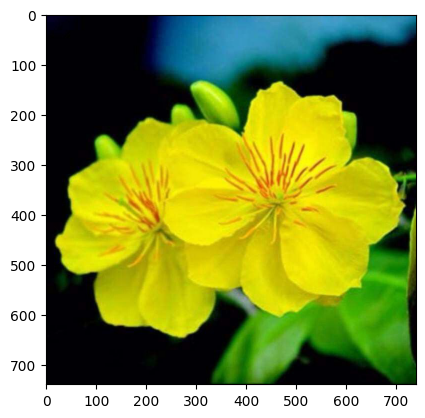

In [15]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Flower/test_hoamai.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 1s 810ms/step
Hoa Mai


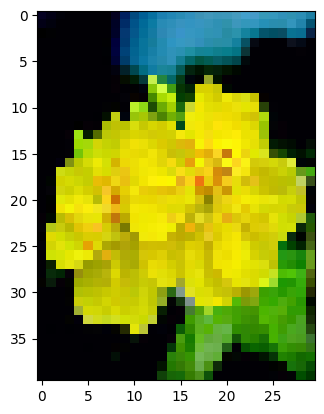

In [16]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Flower/test_hoamai.jpg', target_size=(40, 30))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 40, 30, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

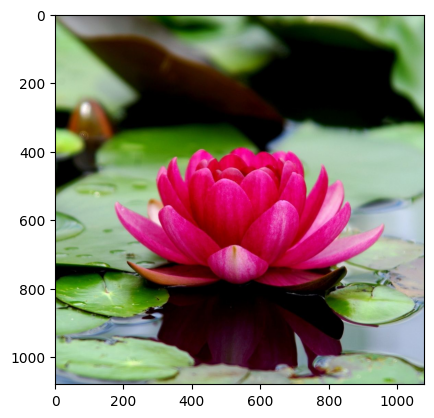

In [17]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Flower/test_hoasen.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 42ms/step
Hoa Sen


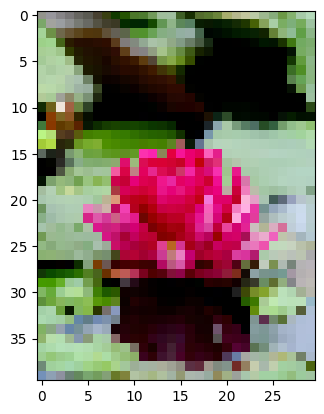

In [18]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Flower/test_hoasen.jpg', target_size=(40, 30))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 40, 30, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)

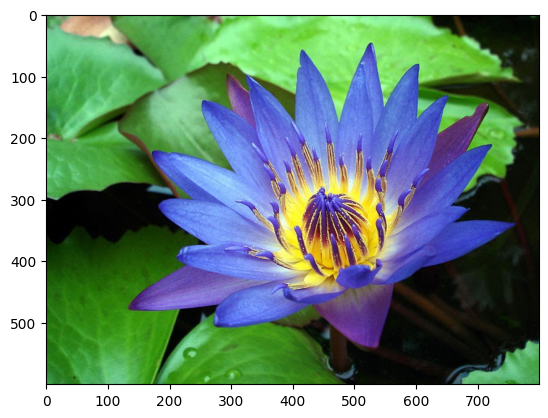

In [19]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_Flower/test_hoasung.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 125ms/step
Bông Súng


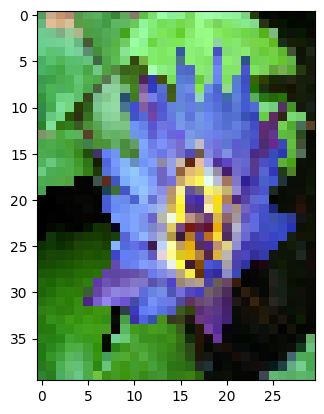

In [20]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_Flower/test_hoasung.jpg', target_size=(40, 30))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 40, 30, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)